In [1]:
# import all libraries and modules
import tensorflow as tf
import pandas as pd  # for data manipulation
import numpy as np    # for mathematical calculation
# import seaborn as sns   # for data visualisation
import matplotlib.pyplot as plt   # for plotting graph
%matplotlib inline 
# matplotlib inline ensures command in cells bellow the cell that outputs a plot does not affect the plot
from sklearn import metrics
from sklearn.preprocessing import QuantileTransformer, StandardScaler, MinMaxScaler
tf.random.set_seed(123)
np.random.seed(123)
import warnings   # to ignore warnings
import datetime
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline,make_pipeline
from sklearn import set_config
import hydroeval as he

In [2]:
plt.style.use('seaborn')
plt.rcParams['figure.figsize'] = (16, 9)

In [3]:
fn = '/home/jefire/project/water/input/gpm_lokoja_q_deep_learning_multivariate_data.csv'

In [4]:
fn = '/home/jefire/project/water/input/gpm_lokoja_q_deep_learning_multivariate_data.csv'

In [5]:
df = pd.read_csv(fn)
df

,date,Pt-47,Rt-92,Tt-128,Tavgt-201,Q
0,2010-01-01,0.072037,156.571559,28.987926,28.117374,3812.4
1,2010-01-02,0.089553,150.598723,29.642680,28.082433,3654.0
2,2010-01-03,0.036683,146.712922,29.432682,28.046663,3548.4
3,2010-01-04,0.028654,141.286889,28.161370,28.009195,3425.2
4,2010-01-05,0.012936,135.644590,27.521034,27.966300,3390.0
...,...,...,...,...,...,...
4286,2021-09-26,14.207973,810.579419,32.813480,30.667623,13598.4
4287,2021-09-27,18.250408,807.736935,33.009026,30.663124,13511.2
4288,2021-09-28,15.165197,808.004420,33.354347,30.661593,13467.6
4289,2021-09-29,10.338213,811.412505,33.514570,30.663618,13467.6


In [6]:
# make a copy of the Dataframe
df_copy = df.copy()
df_copy

,date,Pt-47,Rt-92,Tt-128,Tavgt-201,Q
0,2010-01-01,0.072037,156.571559,28.987926,28.117374,3812.4
1,2010-01-02,0.089553,150.598723,29.642680,28.082433,3654.0
2,2010-01-03,0.036683,146.712922,29.432682,28.046663,3548.4
3,2010-01-04,0.028654,141.286889,28.161370,28.009195,3425.2
4,2010-01-05,0.012936,135.644590,27.521034,27.966300,3390.0
...,...,...,...,...,...,...
4286,2021-09-26,14.207973,810.579419,32.813480,30.667623,13598.4
4287,2021-09-27,18.250408,807.736935,33.009026,30.663124,13511.2
4288,2021-09-28,15.165197,808.004420,33.354347,30.661593,13467.6
4289,2021-09-29,10.338213,811.412505,33.514570,30.663618,13467.6


In [7]:
# convert to datetime object
df_copy.date = pd.to_datetime(df_copy.date, dayfirst = False)
df_copy

,date,Pt-47,Rt-92,Tt-128,Tavgt-201,Q
0,2010-01-01,0.072037,156.571559,28.987926,28.117374,3812.4
1,2010-01-02,0.089553,150.598723,29.642680,28.082433,3654.0
2,2010-01-03,0.036683,146.712922,29.432682,28.046663,3548.4
3,2010-01-04,0.028654,141.286889,28.161370,28.009195,3425.2
4,2010-01-05,0.012936,135.644590,27.521034,27.966300,3390.0
...,...,...,...,...,...,...
4286,2021-09-26,14.207973,810.579419,32.813480,30.667623,13598.4
4287,2021-09-27,18.250408,807.736935,33.009026,30.663124,13511.2
4288,2021-09-28,15.165197,808.004420,33.354347,30.661593,13467.6
4289,2021-09-29,10.338213,811.412505,33.514570,30.663618,13467.6


In [8]:
# get summary statistics
df_copy.describe()

,Pt-47,Rt-92,Tt-128,Tavgt-201,Q
count,4291.000000,4291.000000,4291.000000,4291.000000,4291.000000
mean,3.674196,338.652679,28.325601,28.337924,6780.002985
std,4.604213,311.435155,3.262036,1.477019,6237.500794
min,0.000033,1.322319,17.717693,25.897066,820.640000
25%,0.060465,39.954488,26.402673,26.956178,2642.000000
50%,1.482872,243.175440,28.782104,28.249256,3495.600000
75%,6.087611,628.230218,30.650379,29.777874,9142.694960
max,34.247310,995.638312,34.878845,30.764437,31692.000000


In [9]:
# get datetime statistics
df_copy.date.describe()

<ipython-input-9-230b203a077f>:2: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  df_copy.date.describe()


count                    4291
unique                   4291
top       2010-01-01 00:00:00
freq                        1
first     2010-01-01 00:00:00
last      2021-09-30 00:00:00
Name: date, dtype: object

In [10]:
# set date as index
df_copy.set_index("date", inplace=True)
df_copy

,Pt-47,Rt-92,Tt-128,Tavgt-201,Q
date,,,,,
2010-01-01,0.072037,156.571559,28.987926,28.117374,3812.4
2010-01-02,0.089553,150.598723,29.642680,28.082433,3654.0
2010-01-03,0.036683,146.712922,29.432682,28.046663,3548.4
2010-01-04,0.028654,141.286889,28.161370,28.009195,3425.2
2010-01-05,0.012936,135.644590,27.521034,27.966300,3390.0
...,...,...,...,...,...
2021-09-26,14.207973,810.579419,32.813480,30.667623,13598.4
2021-09-27,18.250408,807.736935,33.009026,30.663124,13511.2
2021-09-28,15.165197,808.004420,33.354347,30.661593,13467.6


In [11]:
# Define a function to prepare multivariate data
# so that it is suitable for a time series.
def custom_ts_multi_data_prep(dataset, target, start, end, window, horizon):
    X = []
    y = []
    start = start + window
    if end is None:
        end = len(dataset) - horizon
    for i in range(start, end):
        indicex = range(i-window, i)
        X.append(dataset[indicex])
        indicey = range(i-1, i-1+horizon)
        y.append(target[indicey])
    return np.array(X), np.array(y)

In [12]:
# hold back the last two years (639 days) data to be used for testing the model
df_test = df_copy[['Pt-47', 'Rt-92', 'Tt-128', 'Tavgt-201',
'Q']].loc['2020-01-01':'2021-09-30']
df_copy.drop(df_copy.loc['2020-01-01':'2021-09-30'].index,inplace=True) # 639 days
df_copy

,Pt-47,Rt-92,Tt-128,Tavgt-201,Q
date,,,,,
2010-01-01,0.072037,156.571559,28.987926,28.117374,3812.400
2010-01-02,0.089553,150.598723,29.642680,28.082433,3654.000
2010-01-03,0.036683,146.712922,29.432682,28.046663,3548.400
2010-01-04,0.028654,141.286889,28.161370,28.009195,3425.200
2010-01-05,0.012936,135.644590,27.521034,27.966300,3390.000
...,...,...,...,...,...
2019-12-27,0.842099,197.938007,27.348043,28.417000,3877.582
2019-12-28,0.808608,192.716801,26.584631,28.372853,3842.696
2019-12-29,0.716000,187.933494,26.287436,28.330293,3825.253


In [13]:
# confirm the drop
df_copy.describe()

,Pt-47,Rt-92,Tt-128,Tavgt-201,Q
count,3652.000000,3652.000000,3652.000000,3652.000000,3652.000000
mean,3.724959,342.755235,28.326120,28.328600,6987.067624
std,4.584397,308.649735,3.271674,1.487092,6340.044918
min,0.000048,3.350540,18.470629,25.897066,820.640000
25%,0.081485,42.264777,26.491793,26.943753,2703.600000
50%,1.604551,255.337499,28.820077,28.266057,3618.800000
75%,6.168955,631.621726,30.660097,29.782179,9545.761750
max,34.247310,973.859648,34.878845,30.764437,31692.000000


In [14]:
# Display Pipeline
set_config(display='diagram')

In [15]:
#1st Quantile Transformer
trf1 = ColumnTransformer([
        ('quantile',QuantileTransformer(output_distribution='normal'),slice(0,4))
    ],remainder='passthrough')

#2nd Standar Scaling
trf2 = ColumnTransformer([
    ('scaler', StandardScaler(),slice(0,4))
    ],remainder='passthrough')

In [16]:
pipe = Pipeline([('trf1', trf1),('trf2', trf2)])

In [17]:
#fit data
pipe.fit(df_copy[['Pt-47', 'Rt-92', 'Tt-128', 'Tavgt-201']])

Pipeline(steps=[('trf1',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('quantile',
                                                  QuantileTransformer(output_distribution='normal'),
                                                  slice(0, 4, None))])),
                ('trf2',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('scaler', StandardScaler(),
                                                  slice(0, 4, None))]))])

In [18]:
# apply transform to train dataset
dataX = pipe.transform(df_copy[['Pt-47', 'Rt-92', 'Tt-128', 'Tavgt-201']])

dataX[0]

array([-0.69313307, -0.22449918,  0.06280371, -0.05328266])

In [19]:
scaler = StandardScaler()
scaler.fit(df_copy[['Q']])

StandardScaler()

In [20]:
# Let’s standardize data
dataY = scaler.transform(df_copy[['Q']])
dataY[0]

array([-0.50080124])

In [21]:
# let’s allow the model to see / train on the past 91 days of data 
# and try to forecast the next 1 day of results. Hence, use horizon = 1
# This is called Single step Forecast
hist_window = 90
horizon = 1
TRAIN_SPLIT = 2809 # 2737 # 2326
x_train_multi, y_train_multi = custom_ts_multi_data_prep(
    dataX, dataY, 0, TRAIN_SPLIT, hist_window, horizon)
x_val_multi, y_val_multi= custom_ts_multi_data_prep(
    dataX, dataY, TRAIN_SPLIT, None, hist_window, horizon)
print ('Single window of past history')
print(x_train_multi[0])
print ('\n Target horizon')
print (y_train_multi[0])
print(len(x_train_multi))
print(len(x_val_multi))

Single window of past history
[[-0.69313307 -0.22449918  0.06280371 -0.05328266]
 [-0.65118423 -0.23795974  0.31646975 -0.06709518]
 [-0.83495614 -0.24780181  0.24040065 -0.08139273]
 [-0.89748755 -0.2605072  -0.26743599 -0.09336177]
 [-1.16097673 -0.27499444 -0.46683279 -0.10868263]
 [-0.83642166 -0.29186621 -0.42437716 -0.12530202]
 [-0.92270414 -0.30516717 -0.43936555 -0.13832773]
 [-1.16544397 -0.31617989 -0.59115609 -0.14837428]
 [-0.80272297 -0.32344646 -0.54769054 -0.15867286]
 [-0.51663536 -0.32487347 -0.44231457 -0.17341863]
 [-0.79144334 -0.33942818 -0.27803326 -0.19110952]
 [-0.75414021 -0.35799809 -0.18992369 -0.20647328]
 [-0.45311811 -0.37819769 -0.08301534 -0.21766531]
 [-0.99579487 -0.39798287  0.26943223 -0.22907763]
 [-0.97823626 -0.40180469  0.35706912 -0.24435899]
 [-1.12102328 -0.40514065  0.1705542  -0.25906058]
 [-0.86172206 -0.41569497 -0.03120112 -0.27175088]
 [-0.91727934 -0.4225235   0.20879295 -0.28692687]
 [-0.96641192 -0.43368293  0.27268161 -0.30485588]
 

In [22]:
# let’s allow the model to see / train on the past 91 days of data 
# and try to forecast the next 1 day of results. Hence, use horizon = 1
# This is called Single step Forecast
hist_window = 90
horizon = 1
TRAIN_SPLIT = 2809 # 2737 # 2326
x_train_multi, y_train_multi = custom_ts_multi_data_prep(
    dataX, dataY, 0, TRAIN_SPLIT, hist_window, horizon)
x_val_multi, y_val_multi= custom_ts_multi_data_prep(
    dataX, dataY, TRAIN_SPLIT, None, hist_window, horizon)
print ('Single window of past history')
print(x_train_multi[0])
print ('\n Target horizon')
print (y_train_multi[0])
print(len(x_train_multi))
print(len(x_val_multi))

Single window of past history
[[-0.69313307 -0.22449918  0.06280371 -0.05328266]
 [-0.65118423 -0.23795974  0.31646975 -0.06709518]
 [-0.83495614 -0.24780181  0.24040065 -0.08139273]
 [-0.89748755 -0.2605072  -0.26743599 -0.09336177]
 [-1.16097673 -0.27499444 -0.46683279 -0.10868263]
 [-0.83642166 -0.29186621 -0.42437716 -0.12530202]
 [-0.92270414 -0.30516717 -0.43936555 -0.13832773]
 [-1.16544397 -0.31617989 -0.59115609 -0.14837428]
 [-0.80272297 -0.32344646 -0.54769054 -0.15867286]
 [-0.51663536 -0.32487347 -0.44231457 -0.17341863]
 [-0.79144334 -0.33942818 -0.27803326 -0.19110952]
 [-0.75414021 -0.35799809 -0.18992369 -0.20647328]
 [-0.45311811 -0.37819769 -0.08301534 -0.21766531]
 [-0.99579487 -0.39798287  0.26943223 -0.22907763]
 [-0.97823626 -0.40180469  0.35706912 -0.24435899]
 [-1.12102328 -0.40514065  0.1705542  -0.25906058]
 [-0.86172206 -0.41569497 -0.03120112 -0.27175088]
 [-0.91727934 -0.4225235   0.20879295 -0.28692687]
 [-0.96641192 -0.43368293  0.27268161 -0.30485588]
 

In [23]:
# Prepare the training and validation time-series data
BATCH_SIZE = 256
BUFFER_SIZE = 150
train_data_multi = tf.data.Dataset.from_tensor_slices((x_train_multi, y_train_multi))
train_data_multi = train_data_multi.cache().shuffle(BUFFER_SIZE).batch(BATCH_SIZE).repeat()
val_data_multi = tf.data.Dataset.from_tensor_slices((x_val_multi, y_val_multi))
val_data_multi = val_data_multi.batch(BATCH_SIZE).repeat()

In [24]:
# Define the Bidirectional LSTM model

Bi_lstm_model = tf.keras.models.Sequential([
tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(150,
return_sequences=True), input_shape=x_train_multi.shape[-2:]),
tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(50)),
tf.keras.layers.Dense(20, activation='relu'),
tf.keras.layers.Dropout(0.2),
tf.keras.layers.Dense(units=horizon),
])
Bi_lstm_model.compile(optimizer='adam', loss='mse')

In [25]:
# the best weights are stored in model path
model_path = r'/home/jefire/project/water/models/lokoja_models/lokoja_q/Bidirectional_LSTM_Multi_Lokoja_Q_1step_90days_gpm_relu_1.h5'

In [26]:
# Configure the model and start training with early stopping and checkpointing

EVALUATION_INTERVAL = 150
EPOCHS = 100
history = Bi_lstm_model.fit(train_data_multi, epochs=EPOCHS,
steps_per_epoch=EVALUATION_INTERVAL,validation_data=val_data_multi,
validation_steps=50,verbose =1,callbacks =[tf.keras.callbacks.EarlyStopping(
    monitor='val_loss', min_delta=0, patience=10, verbose=1, mode='min'),
    tf.keras.callbacks.ModelCheckpoint(model_path,monitor='val_loss', 
    save_best_only=True, mode='min', verbose=0)])

Epoch 1/100
150/150 [==============================] - 35s 101ms/step - loss: 0.1794 - val_loss: 0.1705
Epoch 2/100
150/150 [==============================] - 13s 90ms/step - loss: 0.0647 - val_loss: 0.2186
Epoch 3/100
150/150 [==============================] - 13s 90ms/step - loss: 0.0596 - val_loss: 0.1332
Epoch 4/100
150/150 [==============================] - 13s 89ms/step - loss: 0.0446 - val_loss: 0.1752
Epoch 5/100
150/150 [==============================] - 13s 90ms/step - loss: 0.0461 - val_loss: 0.1076
Epoch 6/100
150/150 [==============================] - 13s 90ms/step - loss: 0.0390 - val_loss: 0.1226
Epoch 7/100
150/150 [==============================] - 13s 90ms/step - loss: 0.0285 - val_loss: 0.1371
Epoch 8/100
150/150 [==============================] - 13s 90ms/step - loss: 0.0289 - val_loss: 0.1757
Epoch 9/100
150/150 [==============================] - 13s 90ms/step - loss: 0.0371 - val_loss: 0.1413
Epoch 10/100
150/150 [==============================] - 13s 90ms/step - 

In [27]:
# Load the best weights into the model
Trained_model = tf.keras.models.load_model(model_path)

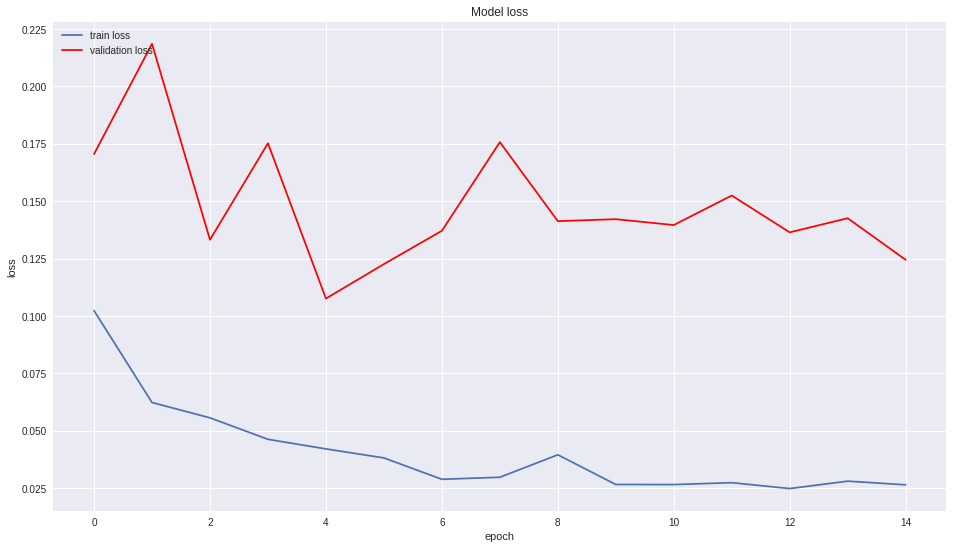

In [28]:
# Plot the loss and val_loss against the epoch
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'],color='red')
plt.title('Model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train loss', 'validation loss'], loc='upper left')
plt.rcParams["figure.figsize"] = [16,9]
plt.show()

In [29]:
# Check the model summary
Trained_model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
bidirectional (Bidirectional (None, 90, 300)           186000    
_________________________________________________________________
bidirectional_1 (Bidirection (None, 100)               140400    
_________________________________________________________________
dense (Dense)                (None, 20)                2020      
_________________________________________________________________
dropout (Dropout)            (None, 20)                0         
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 21        
Total params: 328,441
Trainable params: 328,441
Non-trainable params: 0
_________________________________________________________________


In [30]:
# apply transform to test dataset
validateX = pipe.transform(df_test[['Pt-47', 'Rt-92', 'Tt-128',
'Tavgt-201']])

validateX[0]

array([-0.40304514, -0.19242453, -0.78727046, -0.0310611 ])

In [31]:
# Let’s standardize data
validateY = scaler.transform(df_test[['Q']])
validateY[0]
len(validateY)

639

In [32]:
# Prepare test dataset
x_test_multi, y_test_multi = custom_ts_multi_data_prep(
    validateX, validateY, 0, None, hist_window, horizon)
print ('Single window of past history')
print(x_test_multi[0])
print ('\n Target horizon')
print (y_test_multi[0])
print(len(x_test_multi))

Single window of past history
[[-0.40304514 -0.19242453 -0.78727046 -0.0310611 ]
 [-0.27593301 -0.22176302 -0.71216304 -0.05972194]
 [-0.23691984 -0.23370688 -0.67528175 -0.08388596]
 [-0.65003464 -0.2538932  -0.64594382 -0.11009989]
 [-0.77212871 -0.26076753 -0.57490015 -0.13721454]
 [-0.50512284 -0.28279331 -0.21177136 -0.16474886]
 [-0.52353614 -0.29954652  0.02675629 -0.18874043]
 [-0.75813544 -0.31531689 -0.3001649  -0.21004082]
 [-1.10389714 -0.33209219  0.1106289  -0.22653381]
 [-1.25515486 -0.34760793  0.23814467 -0.24273101]
 [-1.88751688 -0.37799559  0.270822   -0.25995518]
 [-1.28102275 -0.39427623  0.21537451 -0.27476924]
 [-1.44368099 -0.40587814 -0.22333827 -0.2913031 ]
 [-1.33754206 -0.41927194  0.01485449 -0.31126811]
 [-1.13482153 -0.43934455 -0.13213671 -0.33100439]
 [-1.21283105 -0.4597652   0.15716089 -0.35078678]
 [-0.86901931 -0.4773293   0.31830203 -0.37412958]
 [-0.79449251 -0.50702227  0.32936462 -0.39970611]
 [-0.90682504 -0.53563065  0.38192936 -0.42543026]
 

In [34]:
# hold back 455 days data from test DataFrame to be used for testing the model
# validate DataFrame
validate = df_test[['Pt-47', 'Rt-92', 'Tt-128', 'Tavgt-201',
'Q']].tail(548)

In [35]:
predictions = []
for i in x_test_multi:
    # predict the hour
    i_reshape = i.reshape(1, i.shape[0], i.shape[1])
    Predicted_results = Trained_model.predict(i_reshape)
    # store the predictions
    predictions.append(Predicted_results)
print(predictions[0])

[[-0.6198144]]


In [36]:
# convert prediction list to numpy array
predictions = np.array(predictions).reshape(-1, 1)
print(predictions.shape)

(548, 1)


In [37]:
# Rescale the predicted values back to the original scale.

predictions_Inv_trans = scaler.inverse_transform(predictions)
print(predictions_Inv_trans[0])
print(predictions_Inv_trans.shape)

[3057.9546]
(548, 1)


In [38]:
# correct evaluation metrics

# Define the time-series evaluation function

def timeseries_evaluation_metrics_func(y_true, y_pred):
    kgeprime, r, gamma, beta = he.kgeprime(y_pred, y_true)
    kge, r, alpha, beta = he.kge(y_pred, y_true)
    def mean_absolute_percentage_error(y_true, y_pred):
        y_true, y_pred = np.array(y_true), np.array(y_pred)
        return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

    print('Evaluation metric results:-')
    print(f'NSE is : {he.nse(np.array(y_pred), np.array(y_true))}')
    print(f"KGE' is : {kgeprime}")
    print(f'r is : {r}, gamma is : {gamma}')
    print(f'KGE is : {kge}')
    print(f'alpha is : {alpha}, beta is : {beta}')
    print(f'PBIAS is : {he.pbias(np.array(y_pred), np.array(y_true))}')
    print(f'RMSE is : {np.sqrt(metrics.mean_squared_error(y_true, y_pred))}')
    print(f'MARE is : {he.mare(np.array(y_pred), np.array(y_true))}')
    print(f'MSE is : {metrics.mean_squared_error(y_true, y_pred)}') 
    print(f'MAE is : {metrics.mean_absolute_error(y_true, y_pred)}')
    print(f'MAPE is : {mean_absolute_percentage_error(y_true, y_pred)}')
    print(f'R2 is : {metrics.r2_score(y_true, y_pred)}',end='\n\n')
timeseries_evaluation_metrics_func(validate['Q'].tail(548).values.reshape(-1, 1),predictions_Inv_trans)

Evaluation metric results:-
NSE is : [0.84607892]
KGE' is : [0.78253114]
r is : [0.94664459], gamma is : [0.8931332]
KGE is : [0.80265275]
alpha is : [1.05544138], beta is : [1.1817289]
PBIAS is : [-18.17288976]
RMSE is : 2241.0751175593223
MARE is : [0.25280022]
MSE is : 5022417.68254353
MAE is : 1553.4884564681224
MAPE is : 43.4793348072037
R2 is : 0.8460789153251895



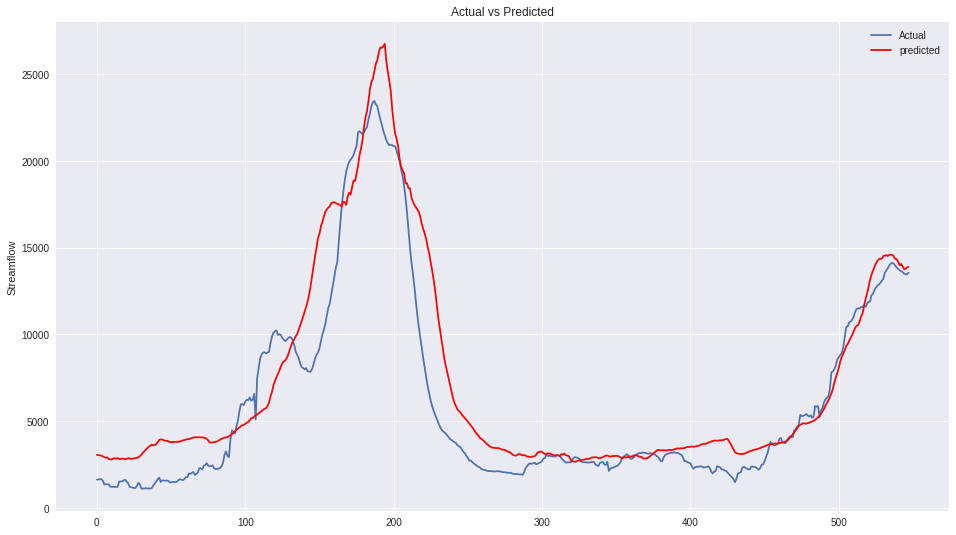

In [39]:
# Plot the actual versus predicted values.
plt.plot( list(validate['Q']))
plt.plot( list(predictions_Inv_trans),color='red')
plt.title("Actual vs Predicted")
plt.ylabel("Streamflow")
plt.legend(('Actual','predicted'))
plt.show()

In [41]:
# save GPM IMERGE train loss and val loss to CSV
df_history = pd.DataFrame.from_records([history.history['loss'],history.history['val_loss']], index=['train_loss', 'val_loss']).transpose()
df_history.to_csv('/home/jefire/project/water/models/lokoja_models/lokoja_q/Bidirectional_LSTM_Multi_Lokoja_Q_1step_90days_gpm_relu_best.csv', index=False)